# IMDB Review Analysis with NLP

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Read and Clean Data Set

In [2]:
dataSet = pd.read_csv("imdb.csv")
reviews = dataSet.iloc[:,0]
sentiments = dataSet.iloc[:,1]

labelEncoder = preprocessing.LabelEncoder()

labels = labelEncoder.fit_transform(sentiments)

del dataSet["sentiment"]
dataSet["labels"] = labels

In [3]:
nltk.download('stopwords')
stopwords = set(stopwords.words("english"))
punctuation = list(string.punctuation)
stopwords.update(punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
LINECOUNT = len(dataSet)

def cleanText(text):
    newText = []
    text = text.lower()
    text = re.sub('[^a-zA-Z]' , " " , text)
    
    for i in text.split():
        if i.strip() not in stopwords:
            newText.append(i.strip())
    
    return " ".join(newText)

array = []

for i in range(0 , LINECOUNT):
    text = cleanText(dataSet["review"][i])
    array.append(text)

In [5]:
countVectorizer = CountVectorizer(max_features=5000)
X = countVectorizer.fit_transform(array).toarray()
Y = dataSet.iloc[:,1].values

x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.25 , random_state=0)

# Machine Learning Model

In [6]:
from keras.models import Sequential
from keras.layers import Dense

EPOCHS = 7

classifier = Sequential()
classifier.add(Dense(2000 , activation='relu', input_dim = 5000 , name = "input-layer"))
classifier.add(Dense(2000 , activation='relu', name = "hidden-layer"))
classifier.add(Dense(1 , activation="sigmoid" , name = "output-layer"))

classifier.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics=['binary_accuracy'] )

classifier.fit(x_train , y_train , epochs = EPOCHS)

Epoch 1/7
1172/1172 [==============================] - 73s 62ms/step - loss: 0.3213 - binary_accuracy: 0.8657
Epoch 2/7
1172/1172 [==============================] - 72s 61ms/step - loss: 0.1621 - binary_accuracy: 0.9384
Epoch 3/7
1172/1172 [==============================] - 72s 61ms/step - loss: 0.0287 - binary_accuracy: 0.9903
Epoch 4/7
1172/1172 [==============================] - 71s 60ms/step - loss: 0.0120 - binary_accuracy: 0.9964
Epoch 5/7
1172/1172 [==============================] - 77s 66ms/step - loss: 0.0071 - binary_accuracy: 0.9981
Epoch 6/7
1172/1172 [==============================] - 76s 64ms/step - loss: 0.0107 - binary_accuracy: 0.9965
Epoch 7/7
1172/1172 [==============================] - 72s 62ms/step - loss: 0.0057 - binary_accuracy: 0.9984


# Confussion Matrix

Create a confussion matrix object to understand results better and print succes rate.

In [7]:
results = classifier.predict(x_test)
results = (results > 0.5)

result_confmatrix = confusion_matrix(y_test , results)
print(result_confmatrix)
print("")

truePred = result_confmatrix[0][0] + result_confmatrix[1][1]
falsePred = result_confmatrix[0][1] + result_confmatrix[1][0]

print("Succes Rate : %" , (truePred / (truePred + falsePred)) * 100)

[[5523  768]
 [ 733 5476]]

Succes Rate : % 87.992


# Data Visualiziton

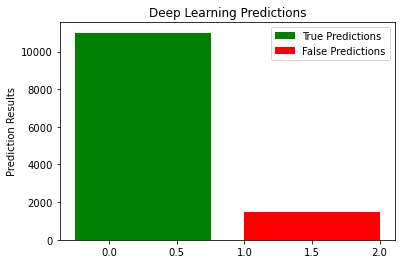

In [8]:
plt.bar([0.25] , [truePred] , label = "True Predictions" , width=1 , color = "green")
plt.bar([1.50] , [falsePred] , label = "False Predictions" , width=1 , color = "red")
plt.legend()
plt.ylabel('Prediction Results')
plt.title('Deep Learning Predictions')
plt.show()